# Welcome to week 3 and your second computer lab!

During the lecture last week, we covered some of the common probability distributions. In this week's lecture you were (re)introduced to hypothesis testing. 

In this week's computer lab, you will learn how to
- find the p-value for a simple hypothesis test
- define the critical region for different hypothesis tests and compute the test statistic
- plot the results.

The first section of this script contains a reminder for some important pandas functionalities. If you're not familiar with them, please have a closer look at those and I would recommend that you spend some time at home to familiarise yourself with them.

If you feel comfortable that you've seen all this below, you can safely skip ahead to 'Task 1'.

# Optional recap: pandas series, dataframes and handling missing values

In [9]:
import pandas as pd

### Optional recap 1: pandas Series and DataFrame indexing/re-indexing

An important method on pandas objects is reindex(), which means to create a new object with data conformed to a new index. Consider an example:

In [10]:
series1 = pd. Series([4.5,7.2,-5.3,3.6],index=['d','b','a','c'])
series1

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

Calling reindex() on the Series object rearranges the data according to the new index, introducing missing values if any index values were not already presented

In [11]:
series2 = series1.reindex(['a','b','c','d','e'])
series2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

Data on series2 is ordered. For ordered data like time series, it may be desirable to do some filling. The method option in reindex() allows us to forward-fill the values by 'ffill' or to backward-fill by 'bfill' :

In [12]:
series3 = pd.Series(['blue','purple','yellow'],index=[0,2,4])
series3

0      blue
2    purple
4    yellow
dtype: object

In [13]:
series3.reindex(range(6),method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [14]:
series3.reindex(range(6),method='bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

Tasks:
- Compare the output from ffill and bfill
- Create a Series object to store the information of Anne's Calendar: [index (time slot), activity] 8:00-9:00 Breakfast; 15:00-16:00 Princeples of Data Analytics; 20:00-21:00 Gym; 11:00-12:00 Math I
- Reindex Anne's timetable by the alphabetical order of her activities

With DataFrame, reindex can alter either the row index, columns or both.

In [15]:
import numpy as np

df = pd.DataFrame(np.arange(9).reshape((3,3)),index=['a','b','d'],columns=['West Midlands','East Midlands','Southwest'])
df

,West Midlands,East Midlands,Southwest
a,0,1,2
b,3,4,5
d,6,7,8


In [16]:
df2 = df.reindex(['a','b','c','d'])
df2

,West Midlands,East Midlands,Southwest
a,0.0,1.0,2.0
b,3.0,4.0,5.0
c,NaN,NaN,NaN
d,6.0,7.0,8.0


In [17]:
df3 = df.reindex(columns=['West Midlands','London','Southwest'])
df3

,West Midlands,London,Southwest
a,0,NaN,2
b,3,NaN,5
d,6,NaN,8


### Optional recap 2: Dropping elements from an axis

Dropping one or more entries is easy if you have an index array or list without those entires.

In [18]:
import pandas as pd
import numpy as np

series1 = pd.Series(np.arange(5),index=['a','b','c','d','e'])
series1

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [19]:
new_obj = series1.drop('c')
new_obj

a    0
b    1
d    3
e    4
dtype: int32

With DataFrame, index values can be deleted from either column or row index.

In [20]:
df = pd.DataFrame(np.arange(9).reshape((3,3)),index=['a','b','d'],columns=['West Midlands','East Midlands','Southwest'])
df

,West Midlands,East Midlands,Southwest
a,0,1,2
b,3,4,5
d,6,7,8


In [21]:
df.drop('a')

,West Midlands,East Midlands,Southwest
b,3,4,5
d,6,7,8


### Optional recap 3: Removing missing values

Missing data occurs commonly in many data analysis applications. One of the goals of pandas is to make working with missing data as painless as possible. The way that missing data is represented in pandas objects uses NaN. We call this a sentinel value that can be detected.

In [22]:
colour_data = pd.Series(['blue','red',np.nan,'green'])
colour_data

0     blue
1      red
2      NaN
3    green
dtype: object

We can use isnull() to detect NaN

In [23]:
colour_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

Missing data can also be dropped using dropna()

In [24]:
colour_data.dropna()

0     blue
1      red
3    green
dtype: object

# Task 1: Hypothesis testing

### Task 1.1: p-values

**DEMO:** 
Assume that we are dealing with a one-sided test and our null hypothesis $H_0$ states about the test statistic that it is standard normally distributed, $T(X) \sim N(0,1)$. We choose the significance level $\alpha = 0.05$. 

If we observe $t=3$, then the p-value can be computed as $\Phi(T \geq 3) = 1 - \Phi(T \leq 3)$ using the cumulative distribution function (CDF) of $N(0,1)$. 

We do this using the norm.cdf() function from the SciPy library. You can read the documentation for that function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

In [25]:
from scipy.stats import norm

print('p-value =', 1-norm.cdf(3)) # remember that CDFs calculate the cumulative probability up to a limit (here 3)

p-value = 0.0013498980316301035


**TASK:** Given a one-sided test and a test statistic $T(X) \sim N(0,1)$ under the null hypothesis. For $t=1.95$, compute the p-value $\Phi(T \geq 1.95)$.

In [26]:
# Your code here
# 1-cdf(T<=1.95)
print('p-value =', 1-norm.cdf(1.95))

p-value = 0.025588059521638562


### Task 1.2: One-sample t-test

**DEMO:**
A bakery supplies loaves of bread to supermarkets. The stated selling weight (and therefore the required minimum expected weight) is $\mu = 2$kg. However, not every package weights exactly 2kg as due to the production facilities there will be variation in the weights. In order to fulfill their contract with the supermarkets, it is important for the bakery to know whether the average weight of the loaves is lower than 2kg.

We assume that the weight of the loaves, $X$, is normally distributed and we assume that the population variance is unnkown.

The supermarket draws a random sample of $n=20$ loaves and weighs then. The sample mean is $\bar{x} = 1.9668$, and the sample variance is $s_x^2 = 0.0927^2$.

We want to conduct a one-sided hypothesis test, where $H_0: \mu \geq 2$ ($H_a: \mu < 2$) and our significance level $\alpha = 0.05$. The test statistic can be computed as $$\frac{(\bar{x}-\mu)\sqrt{n}}{s_x}$$

This test statistic follows a t-distribution with $n-1$ degrees of freedom.

To compute the boundaries of a critical region, we can use the inverse function of the CDF of the t-distribution. Similar to task 1.1, there is a SciPy package for that. You can read the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). And we will visualise our distribution using the matplotlib library and make use of its [annotation function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html).

We follow these steps:

Objective: Visualise the critical region for $H_0: \mu \geq 2$ with $\alpha = 0.05$ and compute test statistic
1. Generate PDF of t-distribution with 19 degrees of freedom (as our $n=20$) and plot
2. Compute critical value for $\alpha = 0.05$
2. Visualise in the plot from 1. the area under the curve as critical region
3. Compute test statistic using the formula above and check whether it falls within the criticl region
4. If test statistic falls within critical region -> reject $H_0$, otherwise retain.

Text(0.5, 0, 'x')

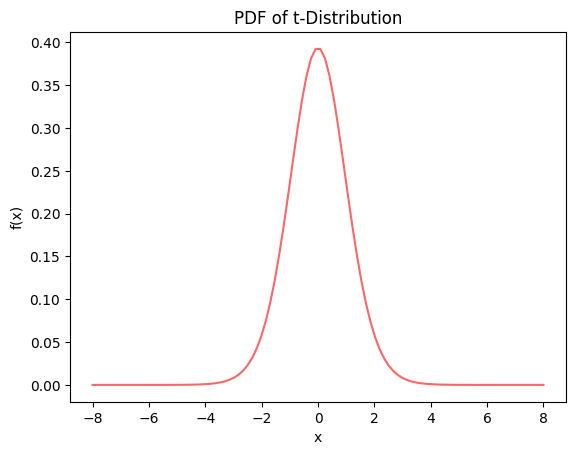

In [27]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import math

# Step 1 Generate PDF of t-distribution with 19 degrees of freedom

x = np.linspace(-8, 8, 100) #Return evenly spaced numbers over a specified interval between -8 and 8. large number will output more smooth curve.
plt.plot(x, sts.t.pdf(x, 19), 'r-', alpha=0.6) #Generate PDF of t-distribution with 19 degree of freedom
plt.title('PDF of t-Distribution') 
plt.ylabel('f(x)')
plt.xlabel('x')



In [28]:
# Step 2. Compute critical value for alpha = 0.05

C_value = sts.t.ppf(
    0.05, 19, loc=0, scale=1
)  # compute critical value by using the inverse function of cdf of t-distribution
"""
0.05：这是你所关心的分位数的概率。在这个上下文中，我们计算的是下侧的5%分位数。
通常，在假设检验的上下文中，这与你选择的显著性水平（alpha）有关。

19：这是自由度的数量。在t检验的上下文中，自由度通常等于样本大小减去一。
在这个例子中，自由度是19，暗示了样本大小可能是20。

loc=0：这是分布的均值。对于标准t分布来说，均值是0。

scale=1：这是分布的标准差。对于标准t分布来说，标准差是1。
"""
C_value

-1.7291328115213678

We can visualise the critical region in the above graph by adding some more lines to the same code to annotate it.

Text(-5.729132811521367, 0.1, 'Critical Value is -1.729')

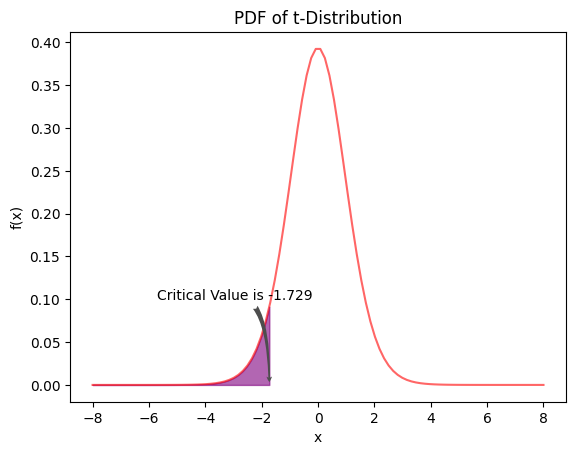

In [29]:
# Step 1. Generate PDF of t-distribution with 19 degrees of freedom

x = np.linspace(-8, 8, 100)
plt.plot(x, sts.t.pdf(x, 19), "r-", alpha=0.6)
plt.title("PDF of t-Distribution")
plt.ylabel("f(x)")
plt.xlabel("x")

# Step 2. Compute critical value for alpha = 0.05

C_value = sts.t.ppf(0.05, 19, loc=0, scale=1)

# Step 3. Visualise critical region

x2 = np.linspace(
    -8, C_value, 100
)  # Return evenly spaced numbers over a specified interval between -8 and critical value.
plt.fill_between(
    x2, sts.t.pdf(x2, 19), color="purple", alpha=0.6
)  # Generate a shaped area under the curve sts.t.pdf(x2, 19)
plt.annotate(
    "Critical Value is -1.729",
    (C_value, 0),
    (C_value - 4, 0.10),
    arrowprops=dict(
        arrowstyle="fancy",
        fc="0.3",
        ec="none",
        connectionstyle="angle3,angleA=0,angleB=-90",
    ),
)  # Annotation

We can also compute the test statistic and visualise that in the same graph.

In [30]:
test_statistic_value = ((1.9668 - 2) / 0.0927) * math.sqrt(20)  # compute test statistc
test_statistic_value

-1.6016711295144075

The test statistic is -1.6016711295144075
The test statistic is not in the critical region, null hypothesis is retained 


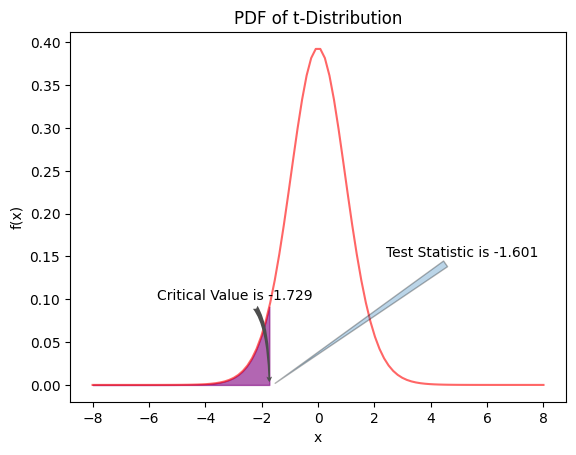

In [31]:
# Step 1. Generate PDF of t-distribution with 19 degrees of freedom

x = np.linspace(-8, 8, 100)
plt.plot(x, sts.t.pdf(x, 19), "r-", alpha=0.6)
plt.title("PDF of t-Distribution")
plt.ylabel("f(x)")
plt.xlabel("x")

# Step 2. Compute critical value for alpha = 0.05

C_value = sts.t.ppf(0.05, 19, loc=0, scale=1)

# Step 3. Visualise critical region

x2 = np.linspace(
    -8, C_value, 100
)  # Return evenly spaced numbers over a specified interval between -8 and critical value.
plt.fill_between(
    x2, sts.t.pdf(x2, 19), color="purple", alpha=0.6
)  # Generate a shaped area under the curve sts.t.pdf(x2, 19)
plt.annotate(
    "Critical Value is -1.729",
    (C_value, 0),
    (C_value - 4, 0.10),
    arrowprops=dict(
        arrowstyle="fancy",
        fc="0.3",
        ec="none",
        connectionstyle="angle3,angleA=0,angleB=-90",
    ),
)  # Annotation

# Step 4. Compute and visualise test statistic

test_statistic_value = ((1.9668 - 2) / 0.0927) * math.sqrt(20)  # compute test statistc
print("The test statistic is", test_statistic_value)
plt.annotate(
    "Test Statistic is -1.601",
    (test_statistic_value, 0),
    (test_statistic_value + 4, 0.15),
    arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.3),
)  # Annotation
print("The test statistic is not in the critical region, null hypothesis is retained ")

**TASK**: Using the same example as above with $\alpha = 0.05$, sample mean $\bar{x} = 1.9668$, and  sample variance $s_x^2 = 0.0927^2$.

This time we assume $n=40$ and $H_0: \mu = 2$ as a **two-sided hypothesis**.

Following the steps from the demo above, visualise the critical region, compute the **test statistic** and make a conclusion about the rejection/retention of the null hypothesis.


-2.0226909117347285 2.022690911734728 -2.265105033820709
The test statistic is -2.265105033820709
The test statistic is not in the critical region, null hypothesis is retained 


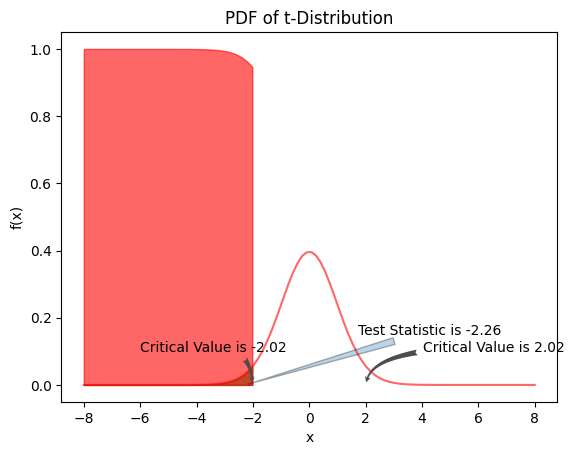

In [65]:
# Step 2. Compute critical value for alpha = 0.05

C_value1 = sts.t.ppf(
    0.025, 39, loc=0, scale=1
)  # compute critical value by using the inverse function of cdf of t-distribution
C_value2 = sts.t.ppf(
    0.975, 39, loc=0, scale=1
)  # compute critical value by using the inverse function of cdf of t-distribution
"""
0.05：这是你所关心的分位数的概率。在这个上下文中，我们计算的是下侧的5%分位数。
通常，在假设检验的上下文中，这与你选择的显著性水平（alpha）有关。

19：这是自由度的数量。在t检验的上下文中，自由度通常等于样本大小减去一。
在这个例子中，自由度是19，暗示了样本大小可能是20。

loc=0：这是分布的均值。对于标准t分布来说，均值是0。

scale=1：这是分布的标准差。对于标准t分布来说，标准差是1。
"""


test_statistic_value = ((1.9668 - 2) / 0.0927) * math.sqrt(40)  # compute test statistc
print(C_value1, C_value2, test_statistic_value)

# Step 1. Generate PDF of t-distribution with 19 degrees of freedom

x = np.linspace(-8, 8, 100)
plt.plot(x, sts.t.pdf(x, 39), "r-", alpha=0.6)
plt.title("PDF of t-Distribution")
plt.ylabel("f(x)")
plt.xlabel("x")

# Step 2. Compute critical value for alpha = 0.05

# Step 3. Visualise critical region

x2 = np.linspace(
    -8, C_value, 100
)  # Return evenly spaced numbers over a specified interval between -8 and critical value.
plt.fill_between(
    x2, sts.t.pdf(x2, 39), color="green", alpha=0.6
)  # Generate a shaped area under the curve sts.t.pdf(x2, 19)

plt.fill_between(
    x2, sts.t.pdf(x2, 39), color="red", alpha=0.6
)  # Generate a shaped area under the curve sts.t.pdf(x2, 19)
plt.annotate(
    "Critical Value is -2.02",
    (C_value1, 0),
    (C_value1 - 4, 0.10),
    arrowprops=dict(
        arrowstyle="fancy",
        fc="0.3",
        ec="none",
        connectionstyle="angle3,angleA=0,angleB=-90",
    ),
)  # Annotation
plt.annotate(
    "Critical Value is 2.02",
    (C_value2, 0),
    (C_value2 + 2, 0.10),
    arrowprops=dict(
        arrowstyle="fancy",
        fc="0.3",
        ec="none",
        connectionstyle="angle3,angleA=0,angleB=-90",
    ),
)  # Annotation

# Step 4. Compute and visualise test statistic

print("The test statistic is", test_statistic_value)
plt.annotate(
    "Test Statistic is -2.26",
    (test_statistic_value, 0),
    (test_statistic_value + 4, 0.15),
    arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.3),
)  # Annotation
print("The test statistic is not in the critical region, null hypothesis is retained ")

### Task 1.3: Comparing the means of two independent samples

A different bakery from the above sells cookies in packages of 500g. The cookies are handmade and packaging is either done by the baker herself or her son. However, some customers claim that the son is more generous than the baker and puts more cookies in his packages. 

A customer decides to find out whether this rumour is true and does an experiment: He buys packages of cookies packed by the baker and her son over 8 days each and weighs the packages. He gets the following two samples:

| Sample | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
| --- | --- | --- |--- |--- |--- |--- |--- |--- |
| Weight (son) X | 512 | 530 | 498 | 540 | 521 | 528 | 505 | 523|
| Weight (baker) Y | 499 | 500 | 510 | 495 | 515 | 503 | 490 | 511

**TASK**

1. Using a critical region approach, test whether the complaint is justified using a two-sided hypothesis test for $H_0: \mu_x = \mu_y$ with $\alpha = 0.05$, and visualise the solution. 

Just like we did in Task 1.2, you will want to compute the test-statistic and compare it to the critical region. You will want to use the [Welch test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for this. It is available via SciPy.stats as the ttest_ind() function.

2. Based on this above, make a statement about the rejection/retention of the null hypothesis using the **p-value**.

Like we did in Task 1.1, for this you will want to compare the p-value to our chosen $\alpha = 0.05$.


In [33]:
l1 = [512, 530, 498, 540, 521, 528, 505, 523]

In [34]:
# Your code here

### Task 1.4: $\chi^2$ Goodness-of-Fit test

Gregor Mendel was a famous biologist and created the concept of [Mendelian inheritance](https://en.wikipedia.org/wiki/Mendelian_inheritance) when describing how pea plants passed on genetic traits. He created a number of experiments with these plants and recorded their different shapes and colours.

Imagine his experiments resulted in the following sample:

| Sample | Round Yellow | Round Green | Edged Yellow | Edged Green 
| --- | --- | --- | --- | --- |
| Observation $X_i$ | 315 | 108 | 101 | 32

Mendel had the hypothesis that the four different types occur in proportions of 9:3:3:1, that is, he proposed about the probabilities of these traits $$p_1 = \frac{9}{16}, p_2 = \frac{3}{16}, p_3 = \frac{3}{16}, p_4 = \frac{1}{16}$$.

As this is our initial assumption, we can say that $H_0: P(X = i) = p_i$.

We want to test whether our sample data is generated from this hypothetical distribution using the $\chi^2$ Goodness-of-Fit test. As before, SciPy let's us achieve this using their chisquare() function with documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html).

**TASK** 

Using the p-value approach as in task 1.1 and the second part of 1.3, compute the test statistic and compare the resulting p-value with our chosen $\alpha = 0.05$ to decide whether the null hypothesis should be retained or rejected.

In [35]:
# Your code here

**OPTIONAL TASK** 

You can also replicate the critical region approach and visualisation as we did before for this.

In [36]:
# Your code here